In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# test train split #
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

0.9736842105263158


In [6]:
# this is cross_val_score #
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
# 把数据分成 cv 5 份，然后取其中一份做测试数据
# 直到 5 份数据全部取到
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


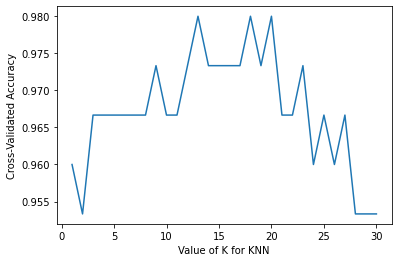

In [8]:
# this is how to use cross_val_score to choose model and configs
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
##    loss = -cross_val_score(knn, X, y, cv=10, scoring='mean_squared_error') # for regression
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy') # for classification
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

train_loss [[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0.]]


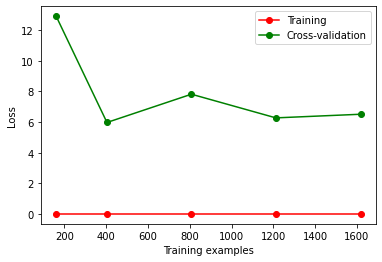

In [12]:
from sklearn.model_selection import  learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target
train_sizes, train_loss, test_loss= learning_curve(
        SVC(gamma=0.01), X, y, cv=10, scoring='neg_mean_squared_error',
        train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

print('train_loss', train_loss[:1])
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

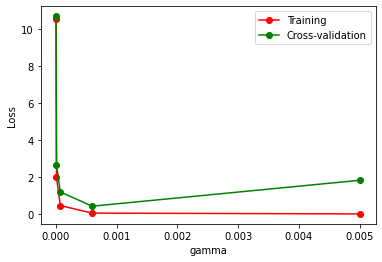

In [16]:
from sklearn.model_selection import  validation_curve
# 生成从10的a次方到10的b次方之间按对数等分的n个元素的行向量
param_range = np.logspace(-6, -2.3, 5)
train_loss, test_loss = validation_curve(
        SVC(), X, y, param_name='gamma', param_range=param_range, cv=10,
        scoring='neg_mean_squared_error')

train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color="r",
             label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
             label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()